# 2020-12-21b

Results below are for commit: https://github.com/gmarkkula/COMMOTIONSFramework/commit/228a0bccfa48ccb4a05f6fb3f5f0bb512a5b961a
(Rerunning the code below for other commits is not guaranteed to give the same results)

Another rerun of the same simulations as in the previous entries, after having removed the use of the "constant" behaviour as long as `oBE*` is active, and at least one of the two behaviours (pass 1st or 2nd) is valid.

Also, again, some minor improvements to the behaviour acceleration calculations have been made (most notably now outputting NaNs if there is an ongoing collision).

Below I am no longer including the full history of notes for these various simulations, just comments per simulation, comparing back to the previous diary entry.

## Init

In [14]:
# put root folder of repo PYTHONPATH (https://stackoverflow.com/questions/714063/importing-modules-from-parent-folder)
import sys
from pathlib import Path
sys.path.append(str(Path('.').absolute().parent))
print(sys.path[-1])

C:\GITHUB\COMMOTIONSFramework


In [15]:
# imports needed to run the simulations
import numpy as np
import commotions
from sc_scenario import get_assumptions_dict, SCSimulation
from sc_scenario_helper import CtrlType

## Just the base model

Getting same results as in prev diary entry, as we should.

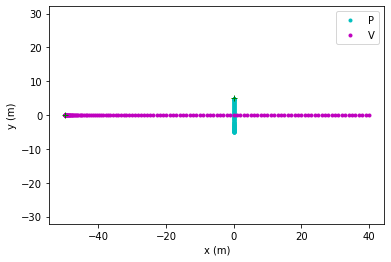

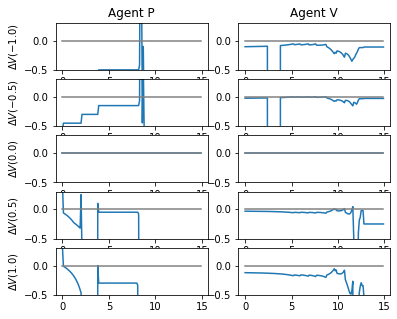

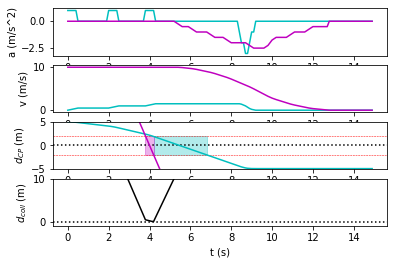

In [16]:
CTRL_TYPES = (CtrlType.SPEED, CtrlType.ACCELERATION) 
INITIAL_POSITIONS = np.array([[0,-5], [40, 0]])
GOALS = np.array([[0, 5], [-50, 0]])
SPEEDS = np.array((0, 10))

optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = False, oBEvs = False, oEA = False)  
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = ('P', 'V'))
sc_simulation.run()
sc_simulation.do_plots(
        trajs = True, kinem_states = True, surplus_action_vals = True)

## `oBEvs`

Very similar behaviour to previous diary entry - just nicer to see the behaviour probabilities without the "constant" behaviour mixed in.

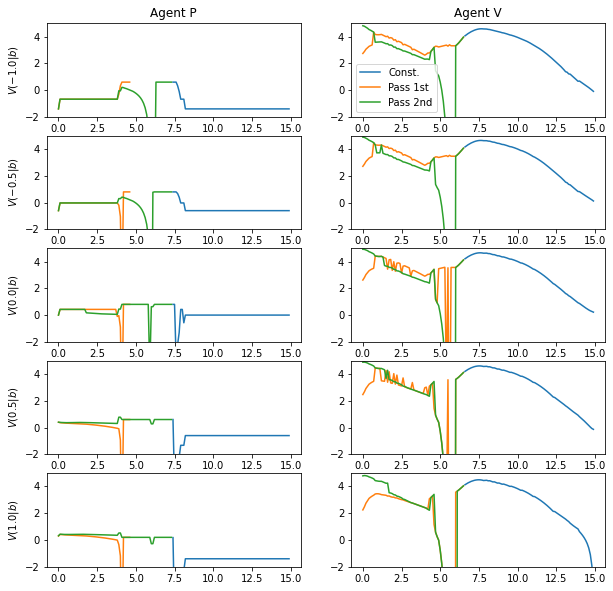

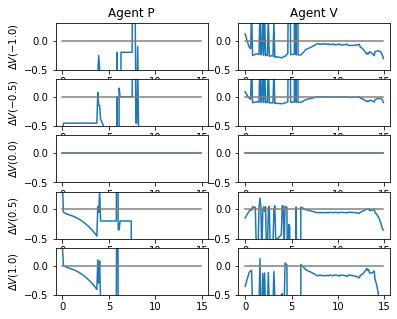

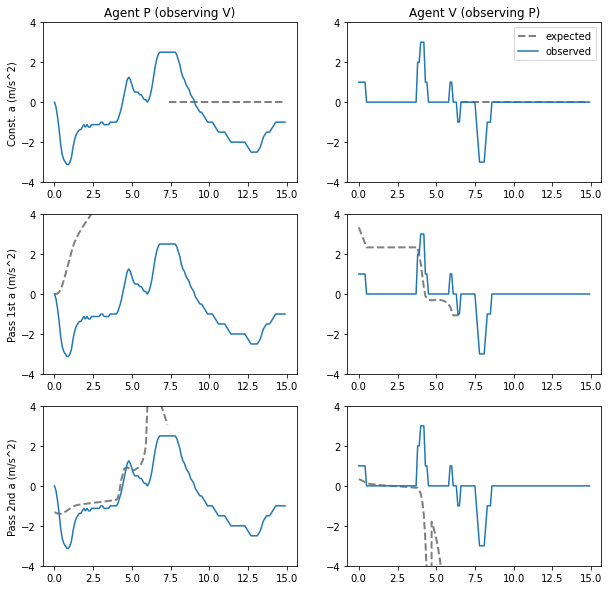

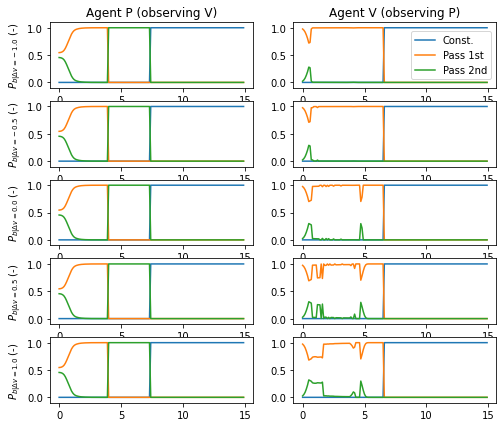

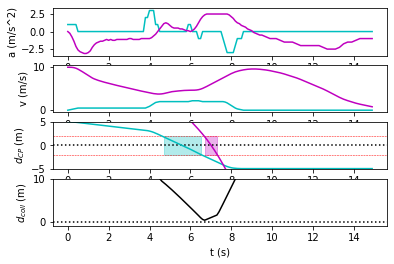

In [17]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = False, oBEvs = True, oEA = False)  
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = ('P', 'V'))
sc_simulation.run()
sc_simulation.do_plots(
        kinem_states = True, beh_probs = True, beh_accs = True, surplus_action_vals = True, action_vals = True)

## `oBEvs`, `oEA`

Same behaviour as in prev note - *except* that now since the constant behaviour is not in the mix to "soften the blow" from the impression that the pedestrian will run into the vehicle's side, the vehicle speed up at passing the pedestrian occurs already here (it occurred later in the testing sequence in the previous note).

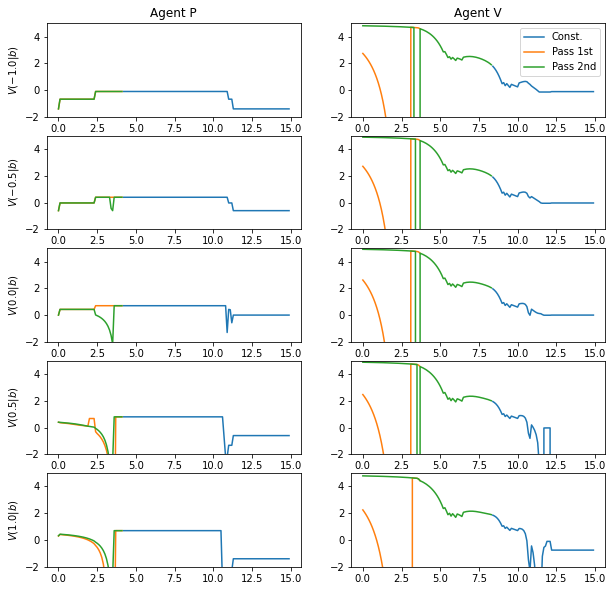

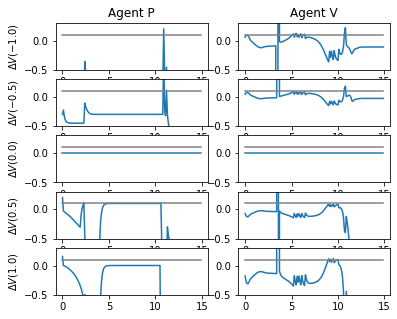

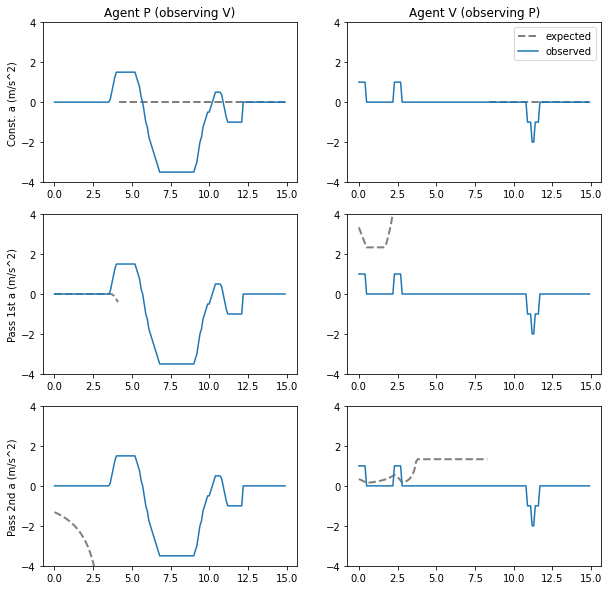

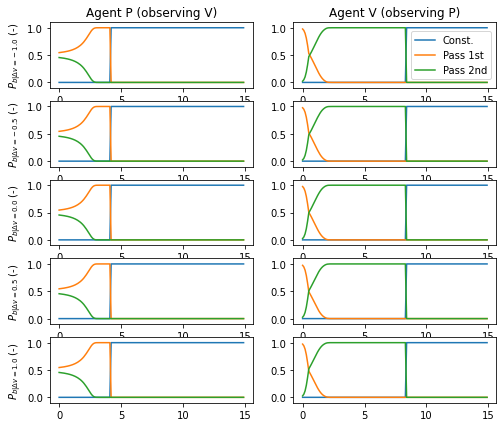

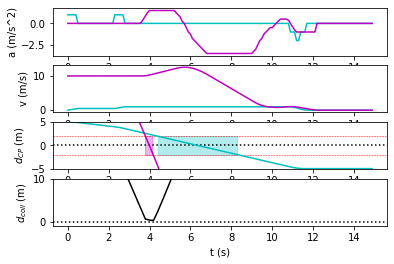

In [18]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = False, oBEvs = True, oEA = True)  
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = ('P', 'V'))
sc_simulation.run()
sc_simulation.do_plots(
        kinem_states = True, beh_probs = True, beh_accs = True, surplus_action_vals = True, action_vals = True)

## `oBEao`

Getting back very similar behaviour as previously.

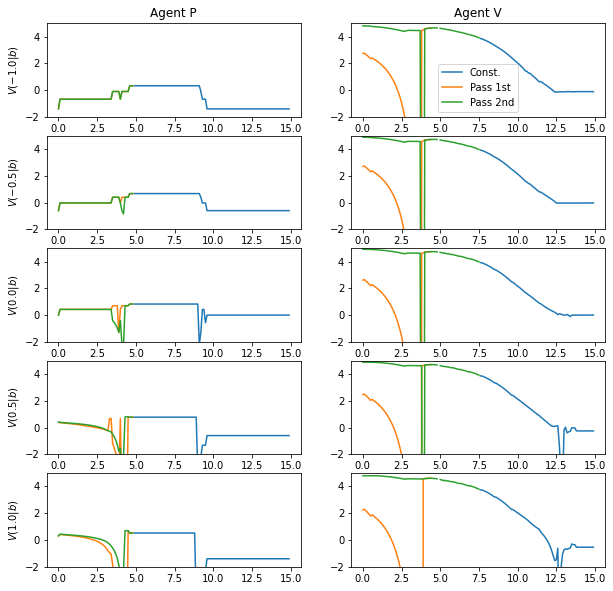

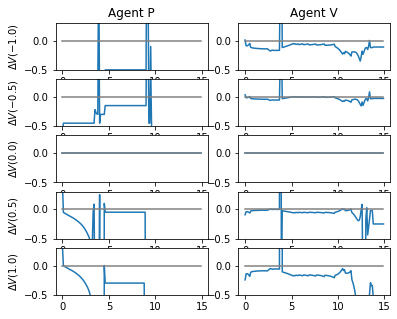

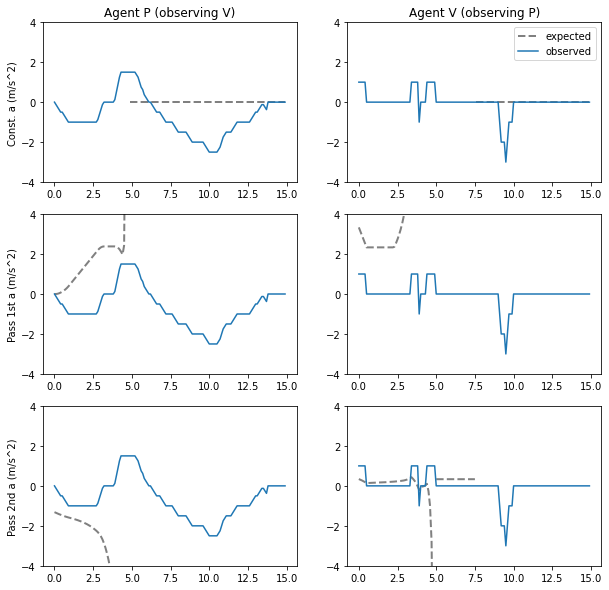

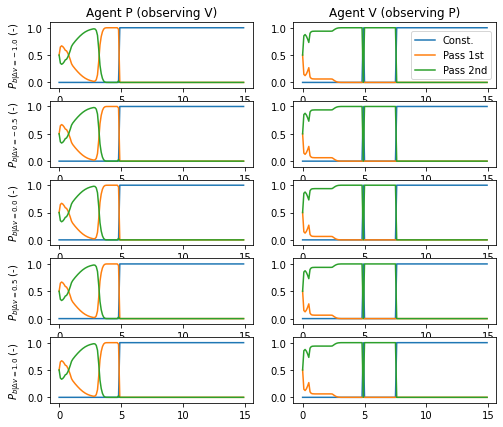

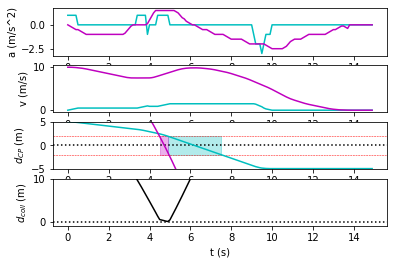

In [19]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = True, oBEvs = False, oEA = False)  
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = ('P', 'V'))
sc_simulation.run()
sc_simulation.do_plots(
        kinem_states = True, beh_probs = True, beh_accs = True, surplus_action_vals = True, action_vals = True)

## `oBEao`, `oEA`

Similar to previously.

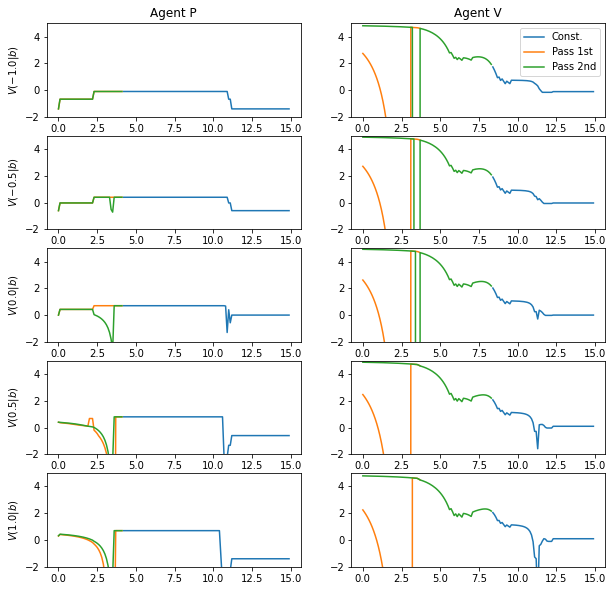

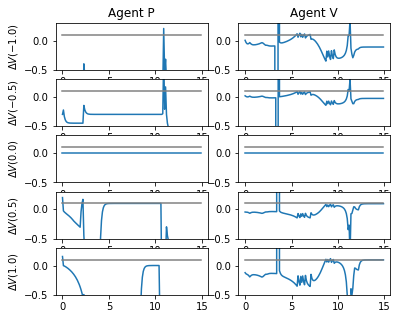

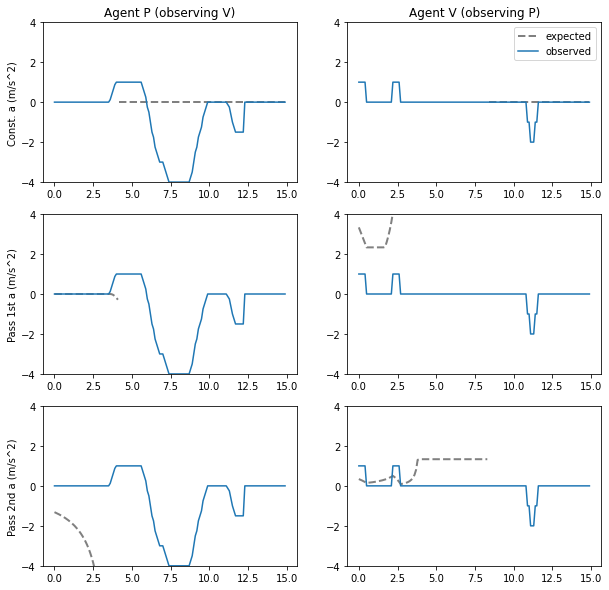

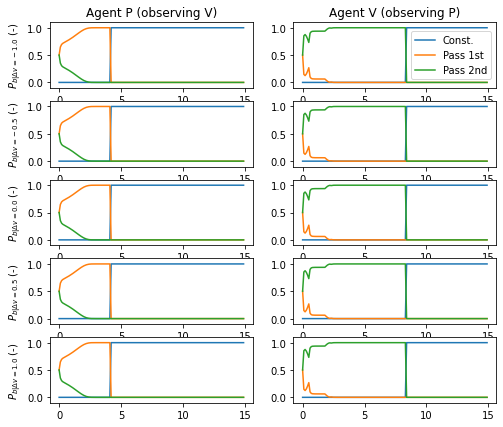

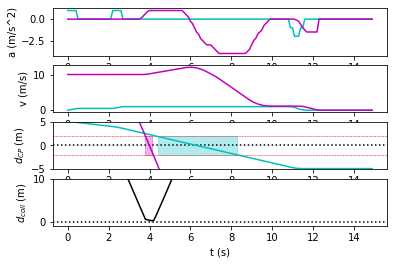

In [20]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = True, oBEvs = False, oEA = True)  
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = ('P', 'V'))
sc_simulation.run()
sc_simulation.do_plots(
        kinem_states = True, beh_probs = True, beh_accs = True, surplus_action_vals = True, action_vals = True)

## `oBEvs`, `oBEao`

Now getting a bit of initial vehicle yielding here that wasn't there in the previous diary entry. And now the downward spike in V(0|P pass 2nd) for the vehicle at around t = 3.8 s does cause a speed-up by the driver - again presumably because the "constant" behaviour isn't in the mix to soften the blow.

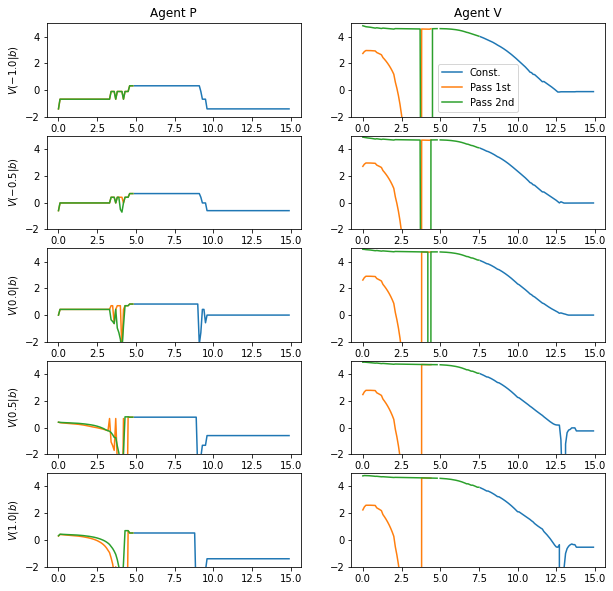

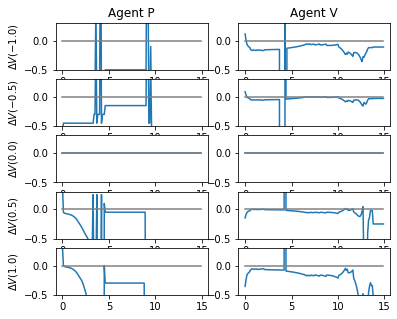

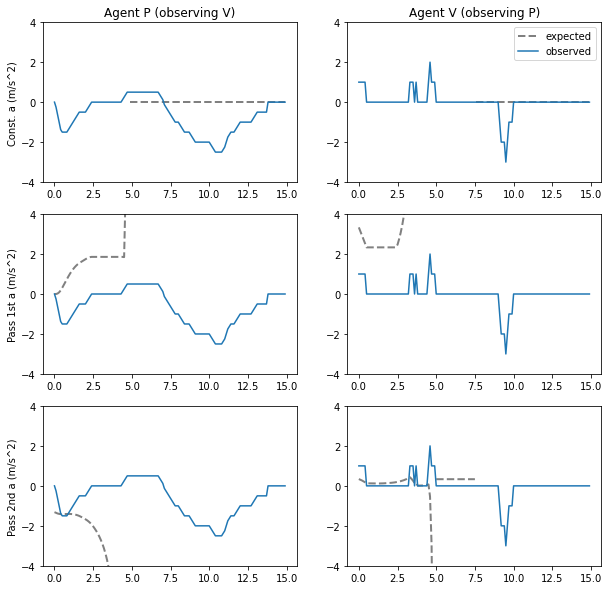

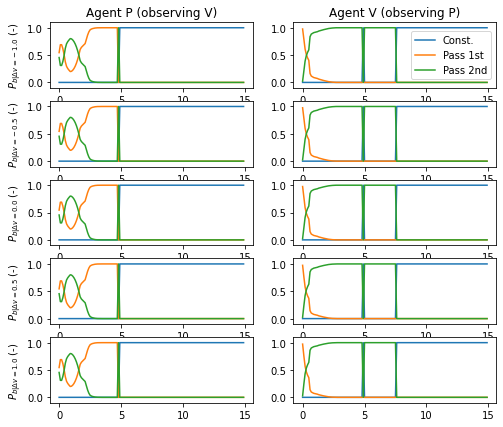

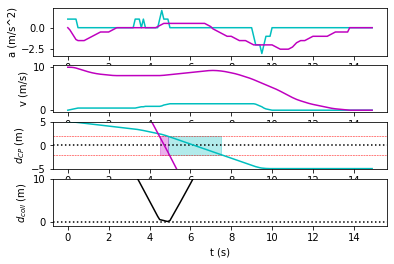

In [21]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = True, oBEvs = True, oEA = False)  
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = ('P', 'V'))
sc_simulation.run()
sc_simulation.do_plots(
        kinem_states = True, beh_probs = True, beh_accs = True, surplus_action_vals = True, action_vals = True)

## `oBEvs`, `oBEao`, `oEA`

Similar to previous entry - again except for the vehicle speed-up when passing the pedestrian.

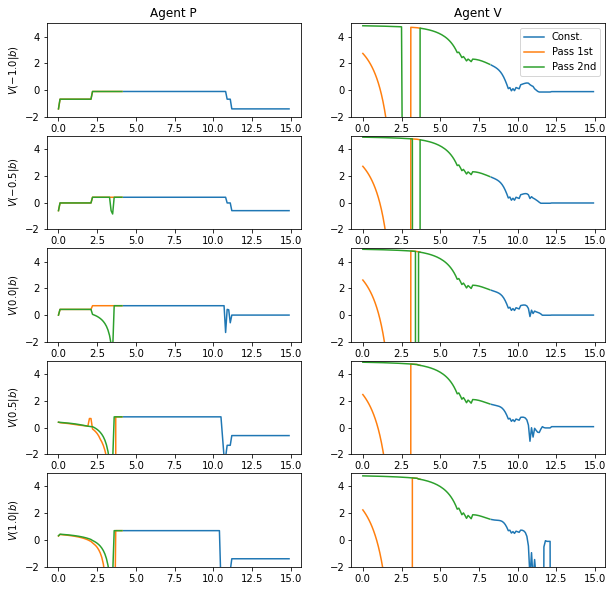

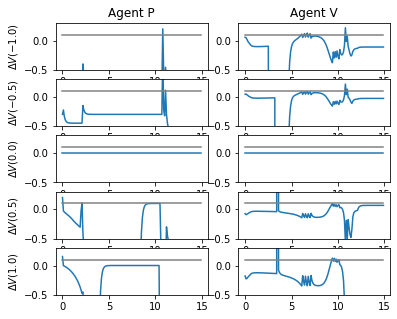

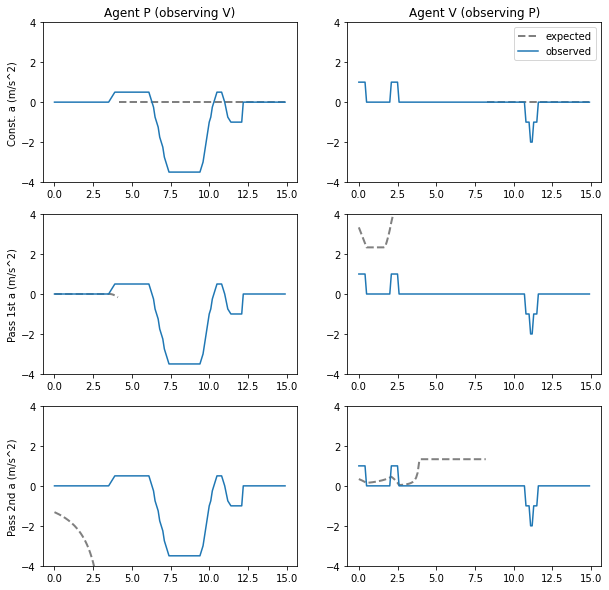

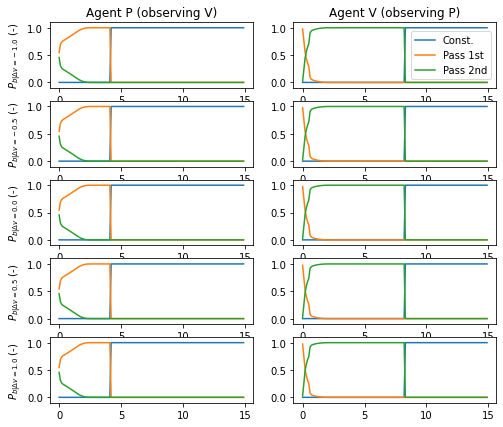

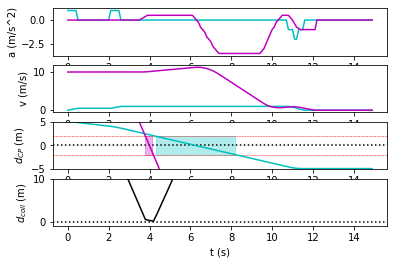

In [22]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = True, oBEvs = True, oEA = True)  
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = ('P', 'V'))
sc_simulation.run()
sc_simulation.do_plots(
        kinem_states = True, beh_probs = True, beh_accs = True, surplus_action_vals = True, action_vals = True)

## Increased initial vehicle TTA

Same results as in previous diary entry. 

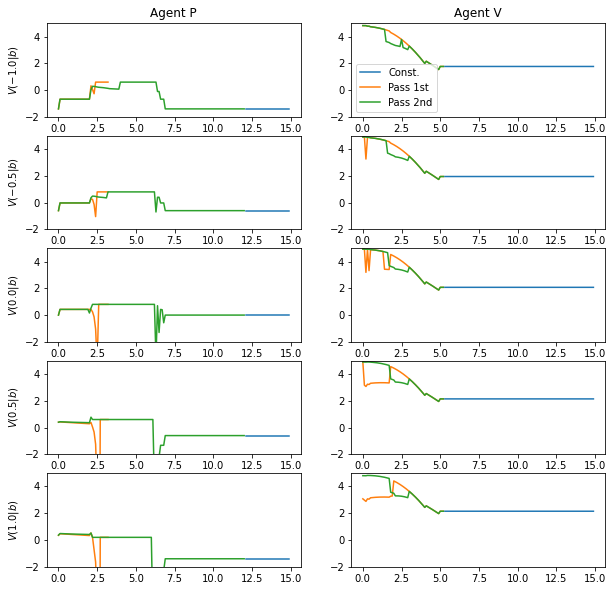

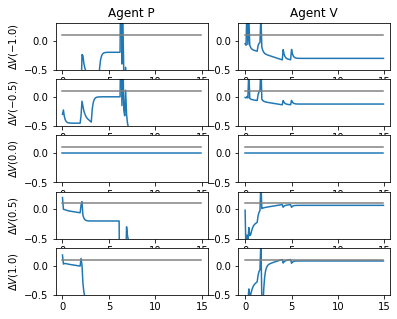

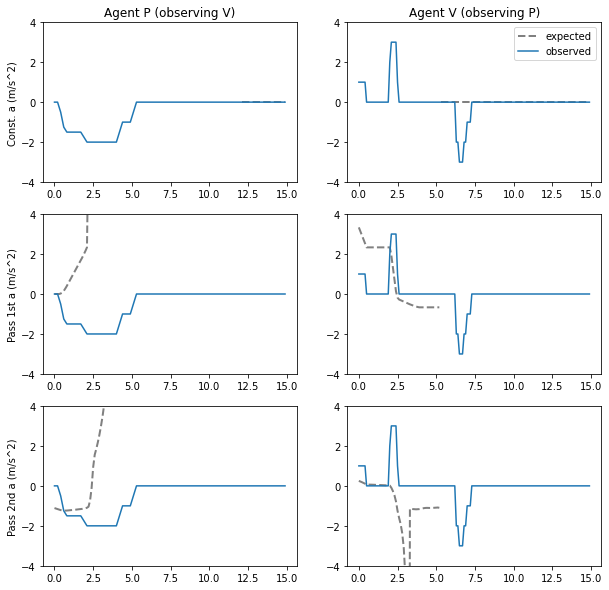

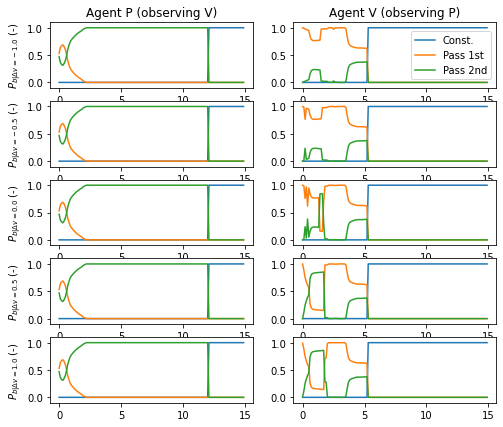

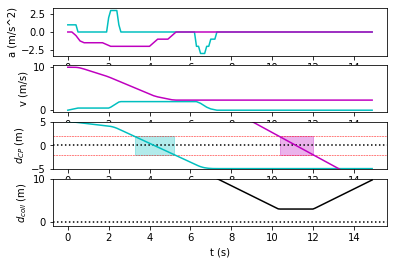

In [23]:
INITIAL_POSITIONS = np.array([[0,-5], [47, 0]])
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = ('P', 'V'))
sc_simulation.run()
sc_simulation.do_plots(
        kinem_states = True, beh_probs = True, beh_accs = True, surplus_action_vals = True, action_vals = True)

## Overall notes

* Overall, the behaviour probabilities look much nicer now without the "constant" behaviour in the mix.
* The remaining mismatch between the conflict space based TTC calculations and the behaviour acceleration calculations continues to cause some trouble in the form of vehicle speed-ups at passing the pedestrian (and possibly the other way round also?) - and this is exacerbated now that the "constant" behaviour is not considered as a possibility. Adding a todo note about this.